### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data

In [2]:
census = pd.read_csv("../../data/census/census_tract.csv")

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (74001, 37)
Columns Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### Removing missing values

This removes _ rows from a dataset with _ rows.

In [8]:
census = census.dropna()

missing_cols = [col for col in census.columns if any(census[col].isnull())]
census[missing_cols].isnull().sum()

Series([], dtype: float64)

### Quick look

Just by looking at 6 columns we can see a few things:

- Growing unemployment leads to poverty
- Poverty decreases with higher income
- Poverty encourages people to carpool
- Commuties that take Transit have longer commutes

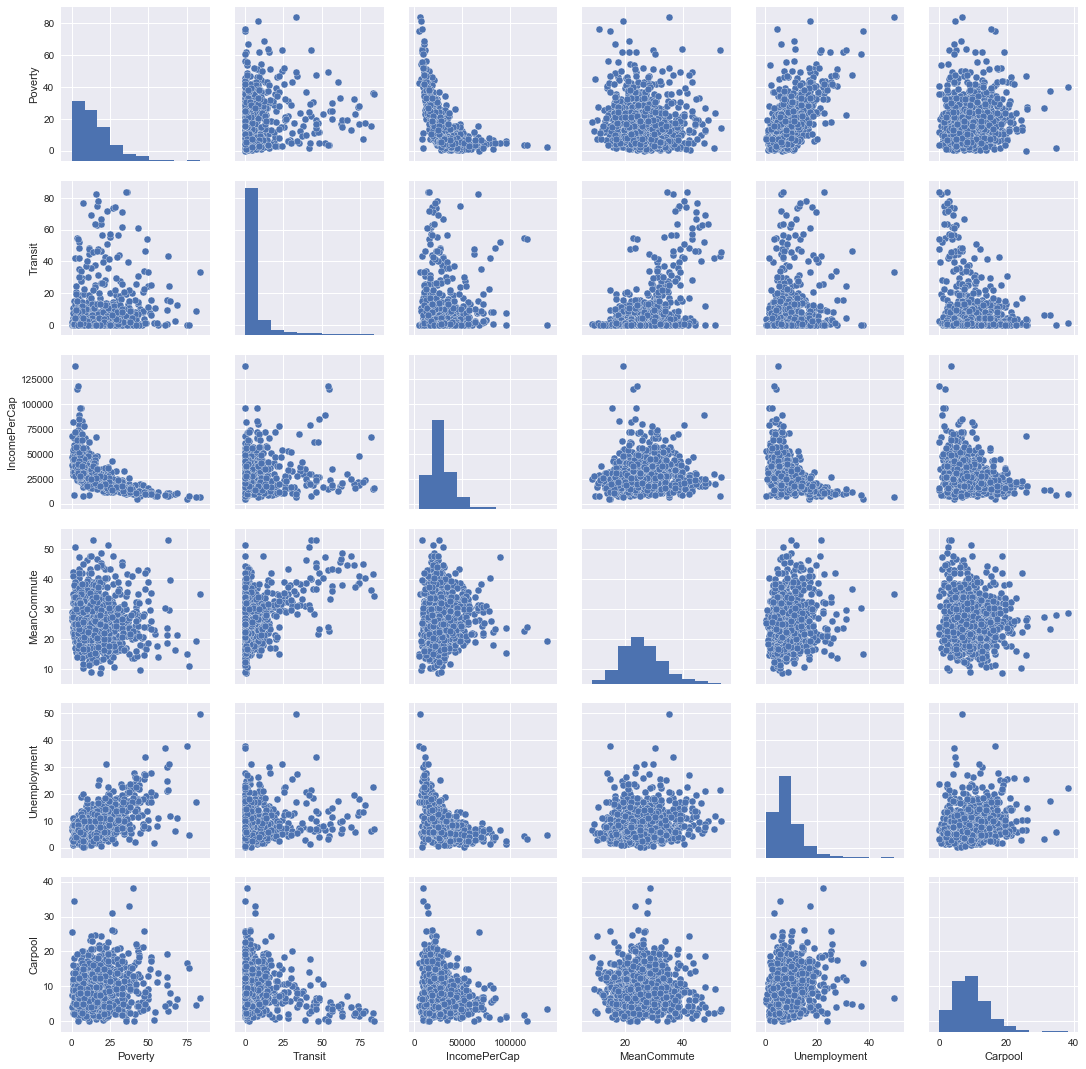

In [18]:
numeric_cols = [
                'Poverty', 'Transit', 'IncomePerCap', 'MeanCommute', 'Unemployment', "Carpool"
               ]

_ = sns.pairplot(census[numeric_cols].sample(1000))